<b>PROJECT OVERVIEW</b>

<p>This project involves a real-world dataset from a telecom company that includes
    customer information, such as demographics, usage patterns, and whether they churned (i.e., left
    the company) or not. The goal is to prepare the data for analysis, explore key patterns and trends,
    and create visualizations to gain insights into factors influencing customer churn.</p>

<p>IMPORTING LIBRARIES AND DATA READING</p>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<p> DATA READING </p>

In [2]:
df = pd.read_csv('C:/Users/f.akinsemoyin/Documents/bootcamp/customer_churn.csv')

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Check for missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values in the dataframe

In [5]:
#check for duplicates
duplicates = df.duplicated()
#print the duplicate rows
print(df[duplicates])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


There are no duplicates in the dataset

<b>Detect Outliers using IQR (Interquartile Range)</b>

In [6]:
#calculate the quartiles
Q1 = df.MonthlyCharges.quantile(0.25)
Q3 = df.MonthlyCharges.quantile(0.75)
Q1, Q3

(35.5, 89.85)

In [7]:
# calculate the IQR
IQR = Q3-Q1
IQR

54.349999999999994

In [8]:
# calculate the lower and upper limits
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-46.02499999999999, 171.375)

In [9]:
# identify outliers
outliers = ((df['MonthlyCharges'] < lower_limit) | (df['MonthlyCharges'] > upper_limit))
data = df[~outliers]
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


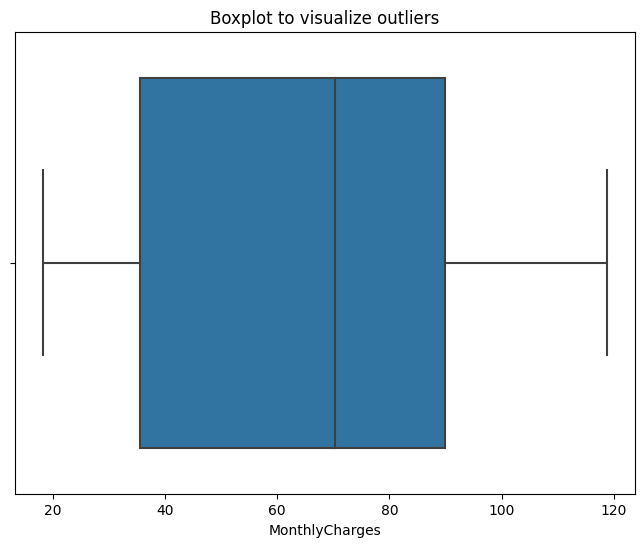

In [67]:
# visualize outlier using a boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Boxplot to visualize outliers')
plt.show()

There are no outliers

In [11]:
#check for unique values in each column
for column in df.columns:
    print(f'column :{column} - Unique Values: {df[column].unique()}')

column :customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
column :gender - Unique Values: ['Female' 'Male']
column :SeniorCitizen - Unique Values: [0 1]
column :Partner - Unique Values: ['Yes' 'No']
column :Dependents - Unique Values: ['No' 'Yes']
column :tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
column :PhoneService - Unique Values: ['No' 'Yes']
column :MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
column :InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
column :OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
column :OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
column :DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
column :TechSuppor

<p> From the columns shown above, we can tell that the demographic can be grouped into three groups</p>

<li>Demographic Information - such as Gender, SeniorCitizen, Partner and Dependents</li>
<li>Customer Account Information - such as Tenure, Contract Type, payment method, credit card, monthly charges, total charge, credit card, paperless billing</li>
<li>Services Information - Such as Phone service, multiple lines,internet services,online security, onine backup,device protection, tech support, streaming Tv, streaming Movies</li>

<p>DATA CLEANING AND PREPROCESSING</p>

In [12]:
# summarise dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset contains 7,043 rows and 21 columns, however Totalcharges which represents the total amount charged to the customer was observed to be an object which is wrong as it is a numerical variable. This column will ned to be transformed into a numeric data type.

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [14]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The analysis above shows a tenure of 0, despite having values for the monthly charges. Total charges is also NAN. This information looks suspicious, therefore observation will be dropped from the data set.

In [15]:
df.dropna(inplace=True)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


REMOVE COLUMNS

In [16]:
# The customerID is not necessary to explain whether a customer will churn or not.
df.drop(columns=['customerID'], inplace=True)

Some payment methods were observed to have the word automatic in parenthesis, this makes the names so long. It's best to remove them

In [17]:
# unique elements of the PaymentMethod column
df.PaymentMethod.unique()
# remove (automatic) from payment method names
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)
# unique elements of the PaymentMethod  column after the modification
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [18]:
key_variables = ['PaymentMethod','PhoneService','MultipleLines','InternetService', 'MonthlyCharges','TotalCharges','Contract','tenure']

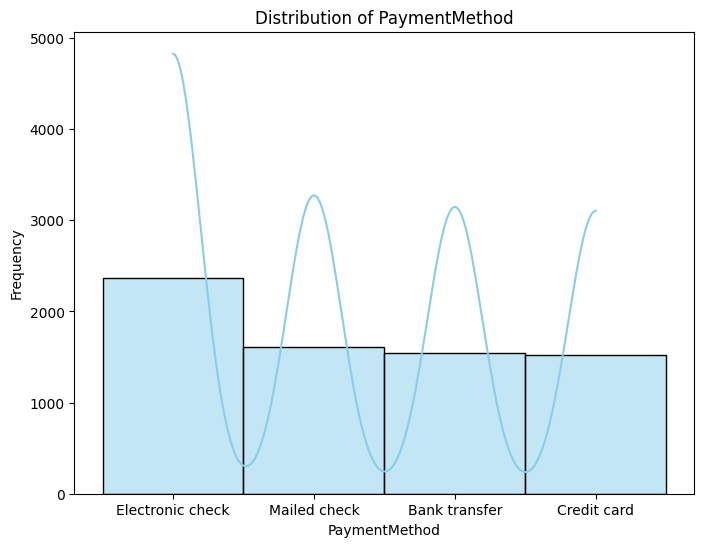

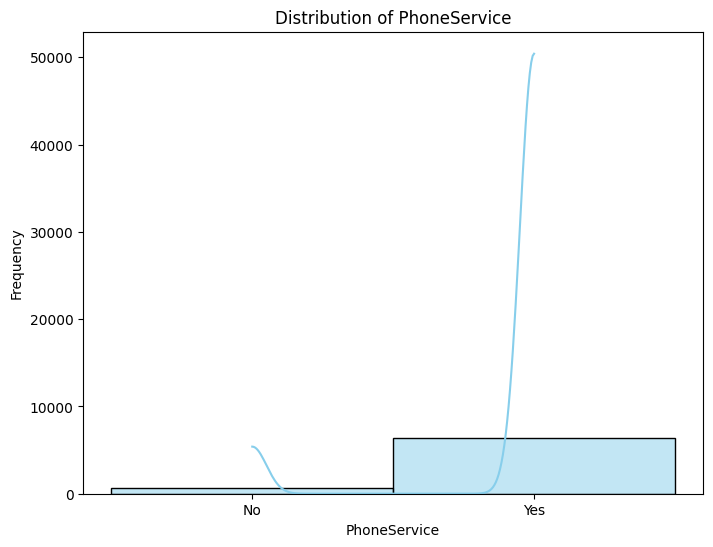

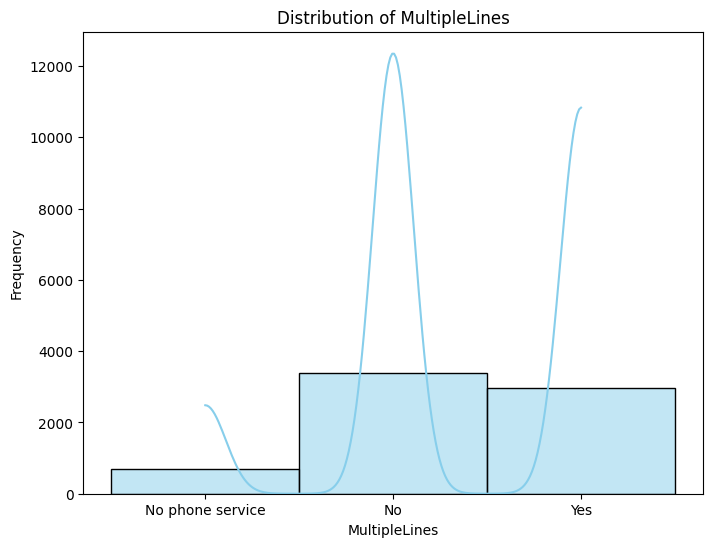

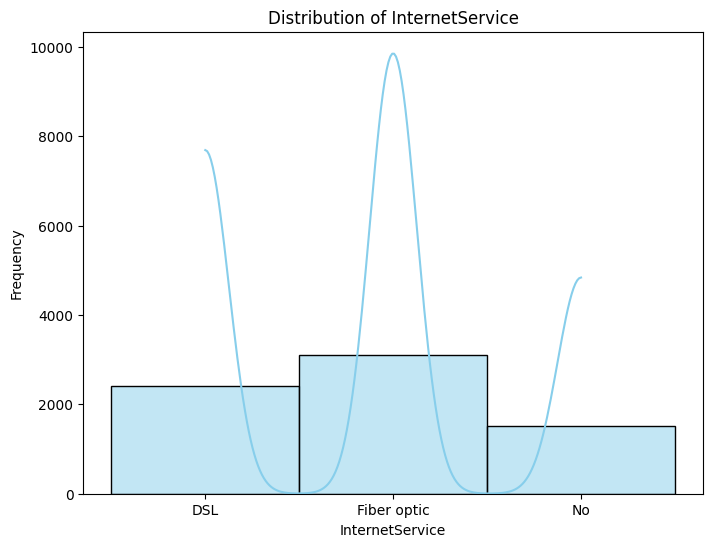

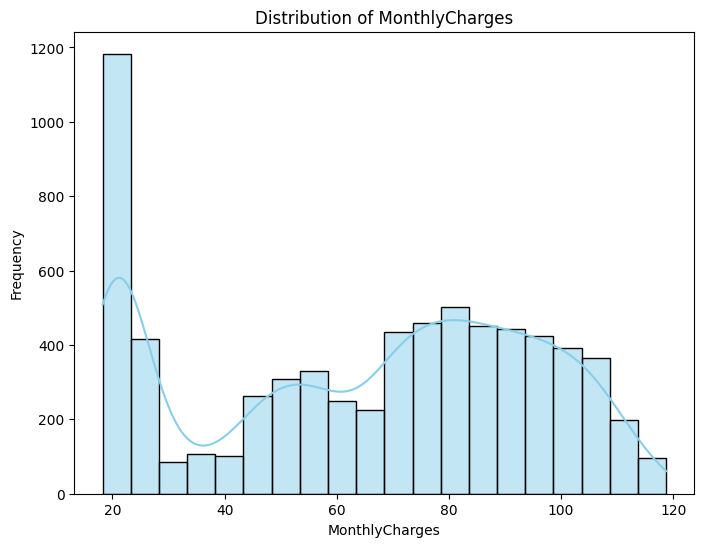

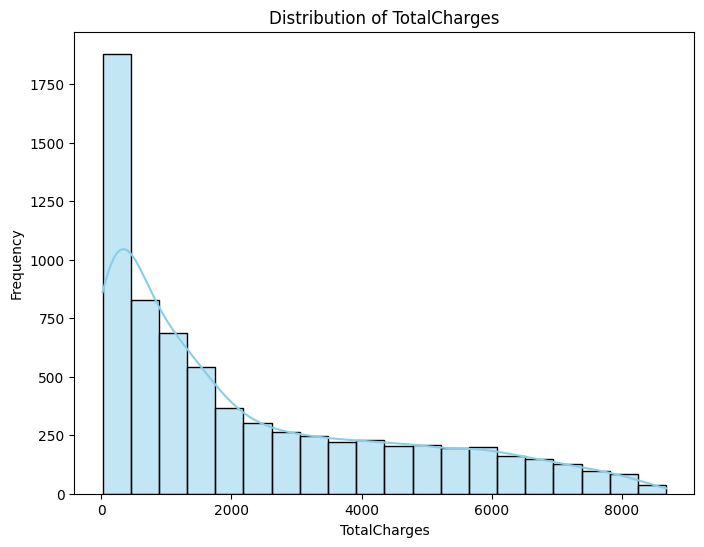

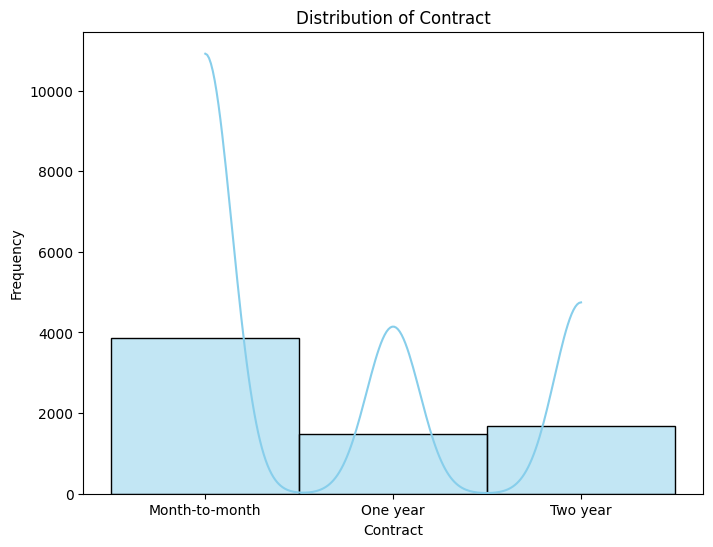

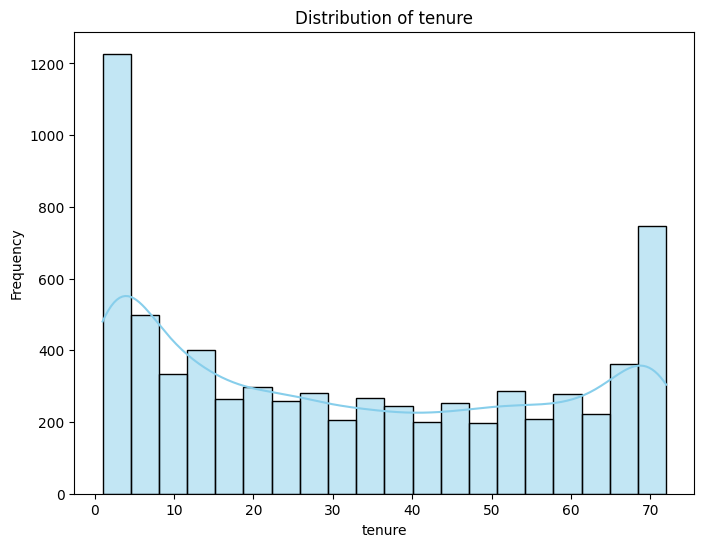

In [19]:
#loop through the key variables and create distribution plots
for variable in key_variables:
    # create a new figure for each variable
    plt.figure(figsize=(8,6))
    
    # create a histogram using Seaborn
    sns.histplot(df[variable], kde=True, bins=20, color='skyblue')
    
    # plot labels and title
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {variable}')
    
    #show the plot
    plt.show()

ENCODE CATEGORICAL VARIABLES USING ONE HOT ENCODING

In [20]:
#one hot encoding for categorical variables with more than two levels and are Nominal in nature
to_be_encoded_columns = ['gender','Partner','PaymentMethod','PhoneService','PaperlessBilling','Dependents','Churn','MultipleLines','InternetService',
                         'OnlineSecurity', 'OnlineBackup','DeviceProtection',
                         'TechSupport','StreamingTV','StreamingMovies','Contract']

#encode categorical variable
encoded_df = pd.get_dummies(df, columns = to_be_encoded_columns)

In [21]:
encoded_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,29.85,29.85,True,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
1,0,34,56.95,1889.50,False,True,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
2,0,2,53.85,108.15,False,True,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,True,True,False,False,True,False,False,False,True,False
4,0,2,70.70,151.65,True,False,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,False,True,False,True,False,False,...,True,False,False,True,False,False,True,False,True,False
7039,0,72,103.20,7362.90,True,False,False,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,11,29.60,346.45,True,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
7041,1,4,74.40,306.60,False,True,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False


NORMALIZATION

In [22]:
# min-max normalization for numeric variables
numeric_columns = ['tenure','MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scalar
for column in numeric_columns:
    # minimum value of the column
    min_column = encoded_df[column].min()
    # maximum value of the column
    max_column = encoded_df[column].max()
    # min max scaler
    encoded_df[column] = (encoded_df[column] - min_column) / (max_column - min_column)

In [23]:
encoded_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0.000000,0.115423,0.001275,True,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
1,0,0.464789,0.385075,0.215867,False,True,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
2,0,0.014085,0.354229,0.010310,False,True,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
3,0,0.619718,0.239303,0.210241,False,True,True,False,True,False,...,True,True,False,False,True,False,False,False,True,False
4,0,0.014085,0.521891,0.015330,True,False,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.323944,0.662189,0.227521,False,True,False,True,False,False,...,True,False,False,True,False,False,True,False,True,False
7039,0,1.000000,0.845274,0.847461,True,False,False,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,0.140845,0.112935,0.037809,True,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
7041,1,0.042254,0.558706,0.033210,False,True,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False


DATA EXPLORATION

In [24]:
#descriptive statistics to summarize the dataset
encoded_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.442560,0.463166,0.261309
std,0.368844,0.345708,0.299363,0.261571
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.112676,0.172512,0.044155
50%,0.000000,0.394366,0.518408,0.159090
75%,0.000000,0.760563,0.712562,0.435719
max,1.000000,1.000000,1.000000,1.000000


In [25]:
encoded_df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'PaymentMethod_Bank transfer', 'PaymentMethod_Credit card',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PhoneService_No', 'PhoneService_Yes', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'Dependents_No', 'Dependents_Yes', 'Churn_No',
       'Churn_Yes', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV

<b>EXPLORE FACTORS INFLUENCING CUSTOMER CHURN</b>

<li>Compare churn rate between both genders</li>

In [26]:
female = encoded_df['gender_Female']
male = encoded_df['gender_Male']
male.value_counts(), female.value_counts()

(gender_Male
 True     3549
 False    3483
 Name: count, dtype: int64,
 gender_Female
 False    3549
 True     3483
 Name: count, dtype: int64)

In [27]:
x = encoded_df['gender_Male'] == True
x


0       False
1        True
2        True
3        True
4       False
        ...  
7038     True
7039    False
7040    False
7041     True
7042     True
Name: gender_Male, Length: 7032, dtype: bool

From the information above, we have 3,549 Males and 3,483 Females in the sample.

In [28]:
#Gender with the highest churn rate

#step 1 - find the churn and unchurned rate for men
churn_rate_male = encoded_df[(encoded_df['gender_Male'] == True) & (encoded_df['Churn_Yes'] == True)]
no_of_churned_male =len(churn_rate_male)
unchurn_rate_male = encoded_df[(encoded_df['gender_Male'] == True) & (encoded_df['Churn_No'] == True)]
no_of_unchurned_male = len(unchurn_rate_male)


In [29]:
#Step 2 - find the churn and unchurned rate for female
churn_rate_female = encoded_df[(encoded_df['gender_Female'] == True) & (encoded_df['Churn_Yes'] == True)]
no_of_churned_female = len(churn_rate_female)
unchurn_rate_female = encoded_df[(encoded_df['gender_Female'] == True) & (encoded_df['Churn_No'] == True)]
no_of_unchurned_female = len(unchurn_rate_female)

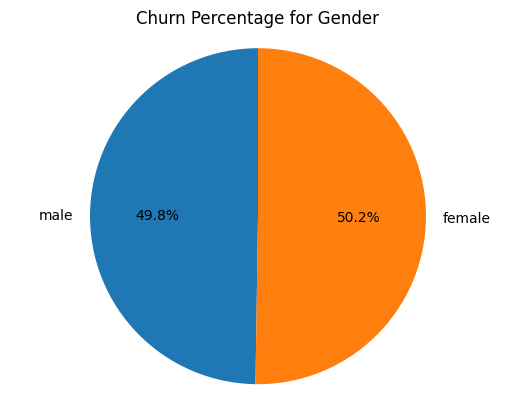

In [30]:
#plot a pie chart to show the which gender churned more
churn_values = [no_of_churned_male, no_of_churned_female]
churn_labels = ['male','female']

plt.pie(churn_values, labels=churn_labels, autopct='%0.1f%%' ,startangle=90)
plt.axis('equal')
plt.title('Churn Percentage for Gender')
plt.show()

In [31]:
print(f'the number of churned male is {no_of_churned_male} while the number of churned female is {no_of_churned_female}')

the number of churned male is 930 while the number of churned female is 939


From the analysis above it shows that females have a higher percentage of churnrate than men but the difference is small.

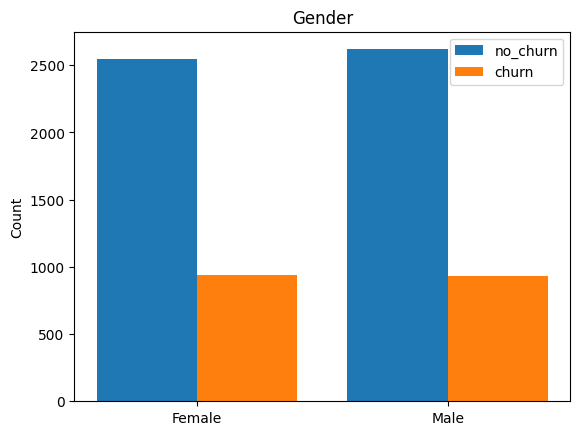

In [32]:
# barplot chart to show the ratio of churned vs unchurned for both Genders
gender= ['Female', 'Male']
no_churn = [no_of_unchurned_female, no_of_unchurned_male]
churn = [no_of_churned_female,no_of_churned_male] 
xpos= np.arange(len(gender))
plt.xticks(xpos,gender)
plt.ylabel('Count')
plt.title('Gender')
plt.bar(xpos-0.2,no_churn, width=0.4, label='no_churn')
plt.bar(xpos+0.2,churn, width=0.4, label='churn')
plt.legend()

<li>Explore the churn rate for senior citizens vs younger citizens</li>

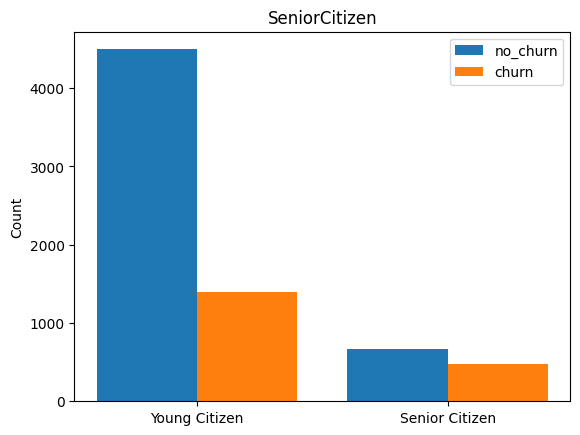

In [33]:
#Senior citizen status churn rate
no_of_nonchurned_citizen = len(encoded_df[(encoded_df['SeniorCitizen'] == 0) & (encoded_df['Churn_Yes'] == False)])
no_of_nonchurned_senior_citizen = len(encoded_df[(encoded_df['SeniorCitizen'] == 1) & (encoded_df['Churn_Yes'] == False)])
no_of_churned_citizen = len(encoded_df[(encoded_df['SeniorCitizen'] == 0) & (encoded_df['Churn_Yes'] == True) ])
no_of_churned_senior_citizen = len(encoded_df[(encoded_df['SeniorCitizen'] == 1) & (encoded_df['Churn_Yes'] == True) ])


citizen_status= ['Young Citizen', 'Senior Citizen']
no_churn = [no_of_nonchurned_citizen, no_of_nonchurned_senior_citizen]
churn = [no_of_churned_citizen,no_of_churned_senior_citizen] 
xpos= np.arange(len(citizen_status))
plt.xticks(xpos,citizen_status)
plt.ylabel('Count')
plt.title('SeniorCitizen')
plt.bar(xpos-0.2,no_churn, width=0.4, label='no_churn')
plt.bar(xpos+0.2,churn, width=0.4, label='churn')
plt.legend()

Insight: The analysis shows that non senior citizens are high churners.

<li>Explore the churn rate based on contract type</li>

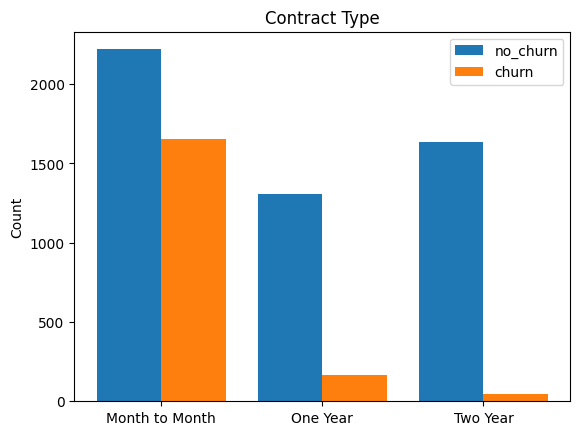

In [34]:
#churn rate based on contract type

no_of_nonchurned_monthly = len(encoded_df[(encoded_df['Contract_Month-to-month'] == True) & (encoded_df['Churn_Yes'] == False)])
no_of_nonchurned_yearly = len(encoded_df[(encoded_df['Contract_One year'] == True) & (encoded_df['Churn_Yes'] == False)])
no_of_nonchurned_two_year = len(encoded_df[(encoded_df['Contract_Two year'] == True) & (encoded_df['Churn_Yes'] == False)])
no_of_churned_monthly = len(encoded_df[(encoded_df['Contract_Month-to-month'] == True) & (encoded_df['Churn_Yes'] == True)])
no_of_churned_yearly = len(encoded_df[(encoded_df['Contract_One year'] == True) & (encoded_df['Churn_Yes'] == True)])
no_of_churned_two_year = len(encoded_df[(encoded_df['Contract_Two year'] == True) & (encoded_df['Churn_Yes'] == True)])


contract_status= ['Month to Month', 'One Year', 'Two Year']
no_churn = [no_of_nonchurned_monthly, no_of_nonchurned_yearly, no_of_nonchurned_two_year]
churn = [no_of_churned_monthly, no_of_churned_yearly, no_of_churned_two_year] 
xpos= np.arange(len(contract_status))
plt.xticks(xpos,contract_status)
plt.ylabel('Count')
plt.title('Contract Type')
plt.bar(xpos-0.2,no_churn, width=0.4, label='no_churn')
plt.bar(xpos+0.2,churn, width=0.4, label='churn')
plt.legend()

insight: Monthly customers are more likely to churn because of no contract terms. The churn rate reduces as the contract duration increases. This is a significant factor

<b>EXPLORING THE DISTRIBUTION OF MORE KEY VARIABLES IN THE DATASET USING UNIVARIATE ANALYSIS</b>

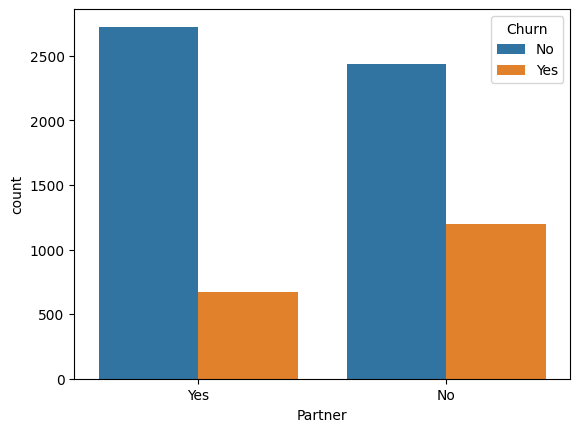

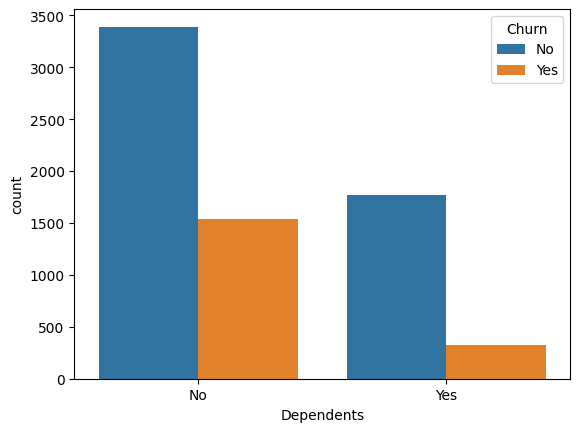

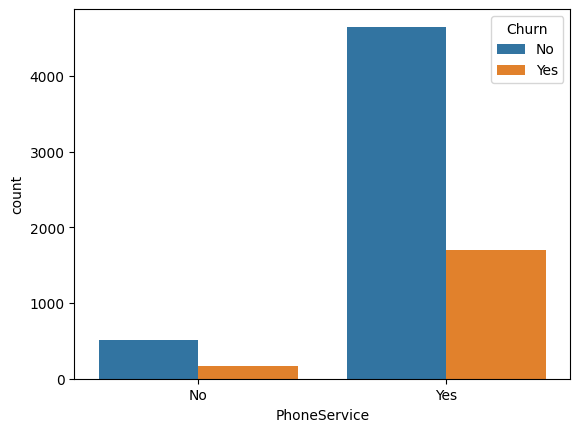

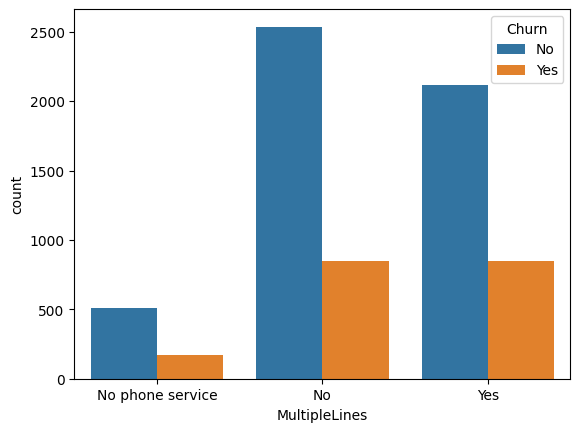

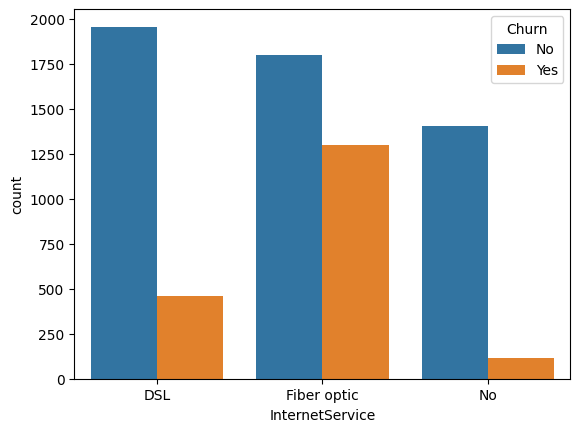

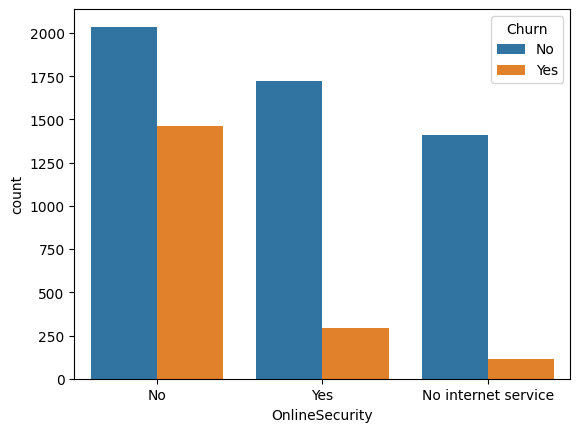

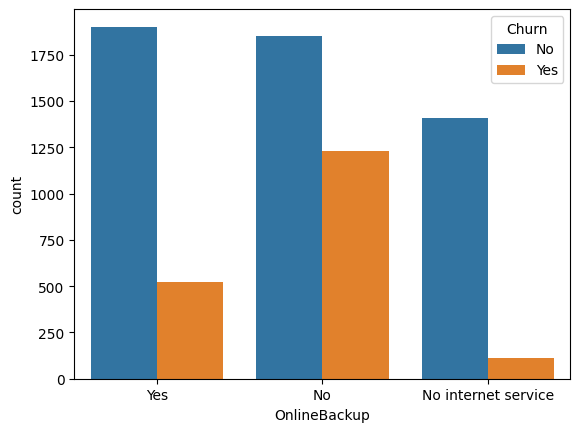

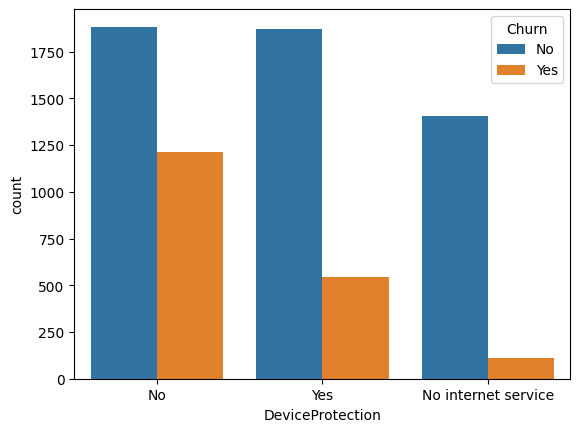

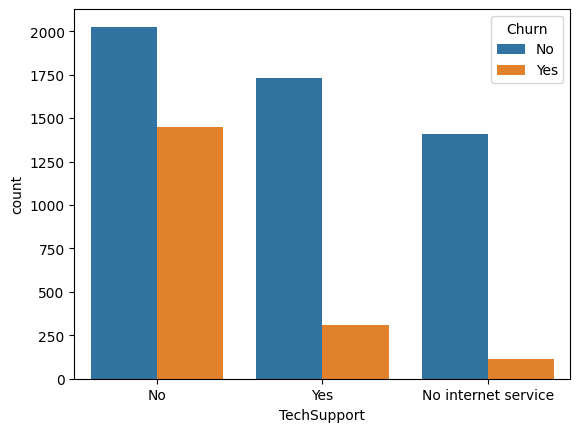

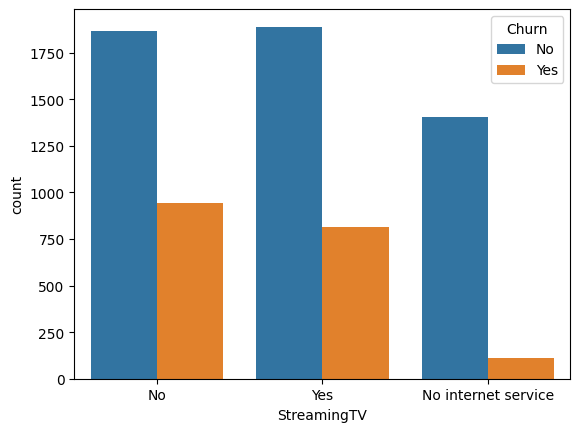

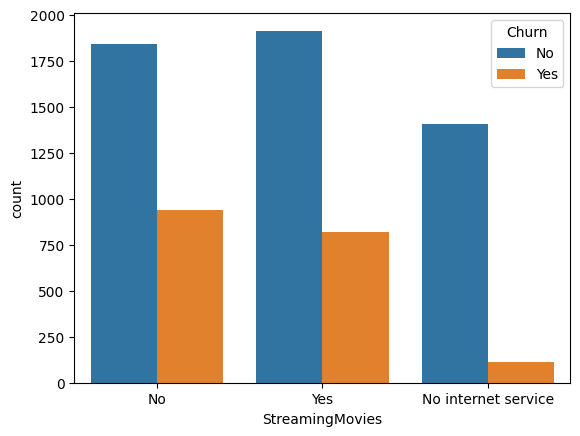

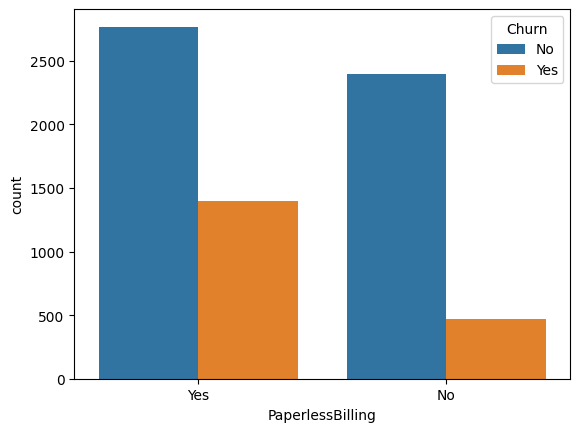

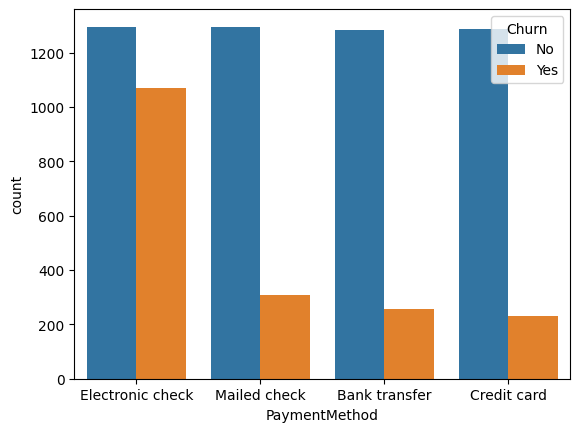

In [35]:
explore_copy = df.copy()

for i, predictor in enumerate(explore_copy.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges','Contract','SeniorCitizen','gender','tenure'])):
    plt.figure(i)
    sns.countplot(data=explore_copy, x=predictor, hue='Churn')

<b>CALCULATE AND VISUALIZE CORRELATIONS BETWEEN VARIABLES USING A HEATMAP</b>

Text(0.5, 1.0, 'correlation Heatmap')

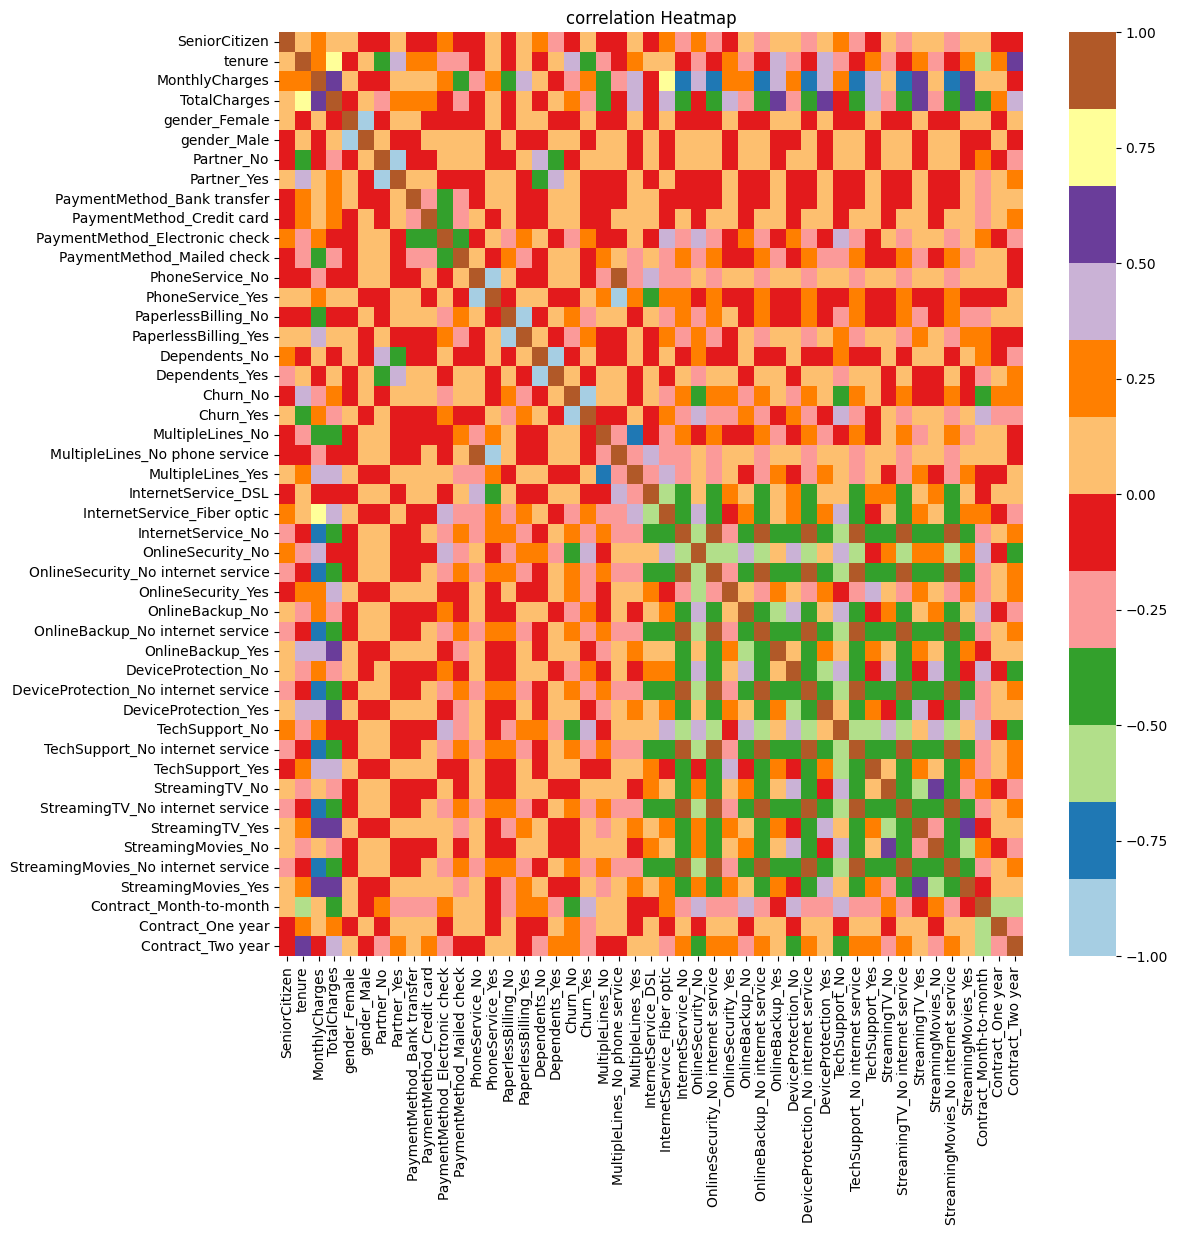

In [36]:
plt.figure(figsize=(12,12))
sns.heatmap(encoded_df.corr(), cmap="Paired")
plt.title('correlation Heatmap')

<b>CONDUCT HYPOTHESIS TESTS TO COMPARE DIFFERENCE BETWEEN CHURNED AND NON-CHURNED CUSTOMERS</b>

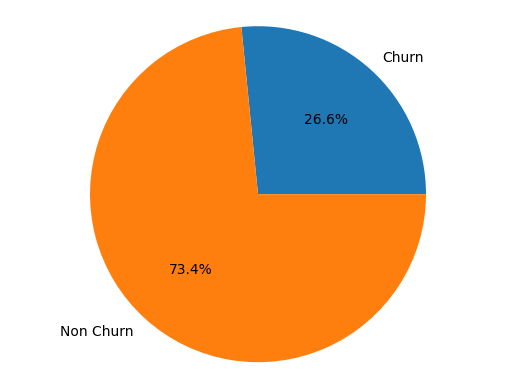

In [37]:
#First of all, let us visualize the proportion of churned vs non-churned customers using a pie chart
churned_customers = len(encoded_df[encoded_df['Churn_Yes'] == True])
non_churned_customers = len(encoded_df[encoded_df['Churn_No']==True])

churn_customer_pie = [churned_customers, non_churned_customers]
churn_labels_pie = ['Churn', 'Non Churn']

plt.pie(churn_customer_pie, labels = churn_labels_pie, autopct='%0.1f%%')
plt.axis('equal')
plt.show()

This analysis shows that the percentage of churned is less than that of non churn

In [38]:
# hypothesis test to compare diffrence between churned and non churned customers.
from scipy import stats
# define the two groups based on churn and non churned customers
group1 = encoded_df[encoded_df['Churn_Yes'] == True]['TotalCharges']
group2 = encoded_df[encoded_df['Churn_No']==True]['TotalCharges']
# perform a t-test
t_statistic, p_value = stats.ttest_ind(group1,group2)
#set significance level alpha
alpha = 0.05
#check if the p-value is less than alpha
if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')


Reject the null hypothesis


<b>SUMMARY TABLE AND STATISTICS FOR VARIOUS CUSTOMER SEGMENTS</b>

In [39]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<li>Contract Segment</li>

In [40]:
contract_segment = df.groupby('Contract')
for contract_type, data in contract_segment:
    print("contract:",contract_type)

contract: Month-to-month
contract: One year
contract: Two year


In [49]:
#calculate summary statistics for contract segment
contract_segment_stats = contract_segment.agg({
    'MonthlyCharges': ['mean','median','std','count','max','min'],
    'TotalCharges': ['mean','median','std','count','max','min']
})

contract_segment_stats.reset_index(inplace=True)
contract_segment_stats

Contract MonthlyCharges                                         \
                            mean median        std count     max    min   
0  Month-to-month      66.398490  73.25  26.926599  3875  117.45  18.75   
1        One year      65.079416  68.75  31.829391  1472  118.60  18.25   
2        Two year      60.872374  64.45  34.712210  1685  118.75  18.40   

  TotalCharges                                              
          mean   median          std count      max    min  
0  1369.254581   679.55  1613.879008  3875  8061.50  18.85  
1  3034.683084  2657.55  2229.730075  1472  8684.80  18.80  
2  3728.933947  3623.95  2571.252806  1685  8672.45  20.35

Text(0.5, 1.0, 'Average Total Charges ')

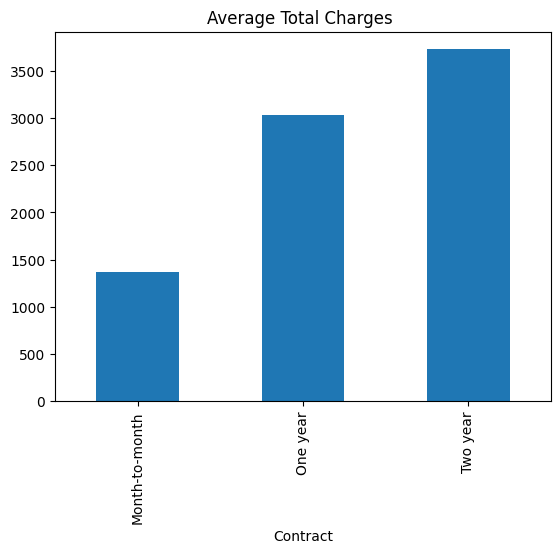

In [70]:
contract_segment['TotalCharges'].mean().plot(kind='bar')
plt.title('Average Total Charges ')

<li>Payment Method</li>

In [42]:
payment_segment = df.groupby('PaymentMethod')
for payment_type, data in payment_segment:
    print("payment type:", payment_type)

payment type: Bank transfer
payment type: Credit card
payment type: Electronic check
payment type: Mailed check


In [50]:
#calculate summary stats for Payment Segment
payment_segment_stats = payment_segment.agg({
    'MonthlyCharges': ['mean','median','std','count','max','min'],
    'TotalCharges': ['mean','median','std','count','max','min']
})

payment_segment_stats.reset_index(inplace=True)
payment_segment_stats

PaymentMethod MonthlyCharges                                          \
                              mean  median        std count     max    min   
0     Bank transfer      67.205577  73.250  30.572447  1542  118.75  18.40   
1       Credit card      66.519264  73.050  30.621316  1521  117.50  18.25   
2  Electronic check      76.255814  80.550  24.053655  2365  118.65  18.85   
3      Mailed check      43.958354  34.875  26.318624  1604  118.60  18.70   

  TotalCharges                                              
          mean   median          std count      max    min  
0  3079.299546  2474.65  2357.735491  1542  8684.80  19.25  
1  3071.396022  2453.30  2407.402613  1521  8670.10  19.30  
2  2090.868182  1253.90  2155.435320  2365  8564.75  18.85  
3  1054.483915   467.35  1442.869051  1604  8331.95  18.80

Text(0.5, 1.0, 'Average Total Charges ')

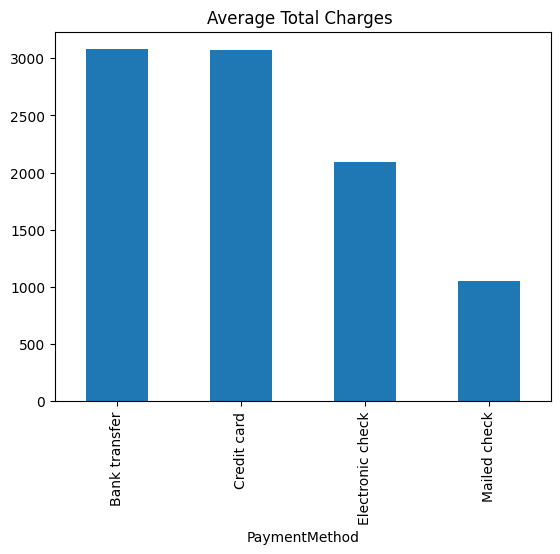

In [69]:
payment_segment['TotalCharges'].mean().plot(kind='bar')
plt.title('Average Total Charges ')

<b>RELATIONSHIP BETWEEN TOTAL CHARGES AND MONTHLY CHARGES</b>

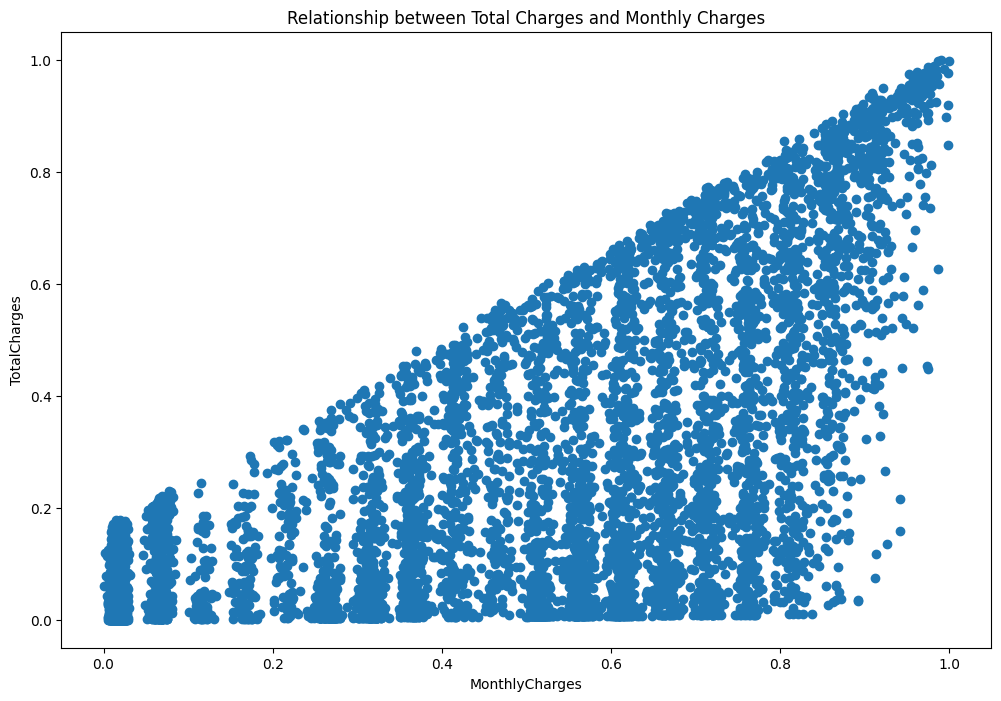

In [44]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(encoded_df['MonthlyCharges'],encoded_df['TotalCharges'])

# Create a title
plt.title('Relationship between Total Charges and Monthly Charges')

# x label
plt.xlabel('MonthlyCharges')

#ylabel
plt.ylabel('TotalCharges')

# Show the plot
plt.show()

Total Charges increase as Monthly Charges increase.

<b>CONCLUSION</b>

Some of the insights discovered in the analysis that could affect customer churn are:

<li>Non Senior citizens are high churners</li>
<li>Monthly Contract type are most likely to churn because of no contract terms. The churn rate reduces as the contract duration increases.</li>
<li>Electronic check payment method are  high churners while credit card customers are the lowest churners</li>
<li>Customers without Tech Support are the high churners</li>
<li>Customers without Device protection are high churners</li>
<li>Customers without Online Security are high churners</li>

